# Prediksi klaim asuransi

### Import the Libraries


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset



In [8]:
data = pd.read_csv('insurance.csv')

print(data.shape)

data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.isnull().sum() # mengembalikan jumlah nilai yang hilang dalam kumpulan data.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
data['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [14]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Data Analysis

Text(0.5, 1.0, 'Age vs Charges')

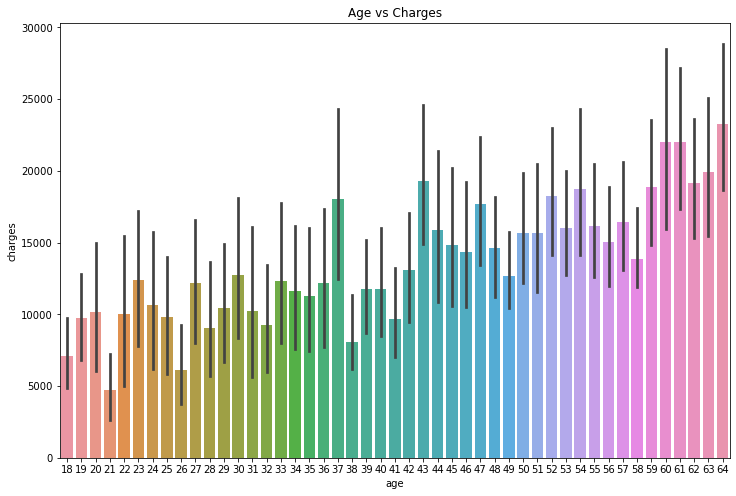

In [18]:
# Age vs Charges
# Semakin tua usia semakin banyak biaya asuransi (perkiraan kasar)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

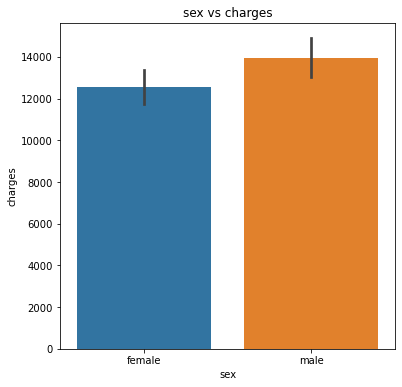

In [19]:
# sex vs charges
# laki-laki memiliki biaya asuransi yang sedikit lebih besar daripada perempuan pada umumnya

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

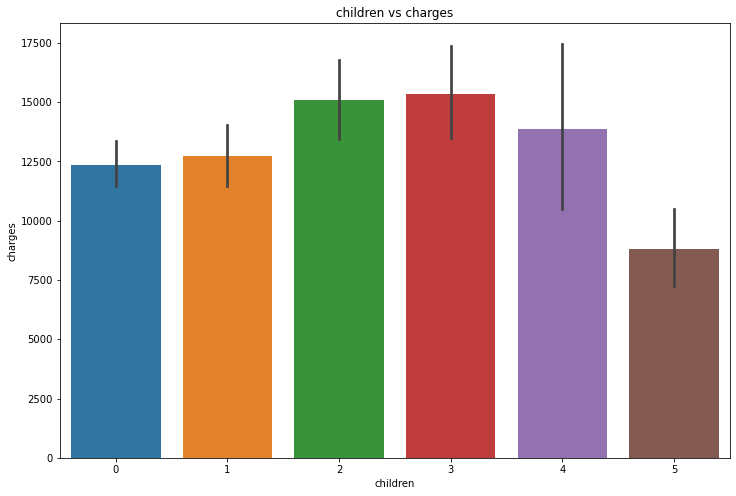

In [20]:
# children vs charges
# mempunyai anak  memiliki ketergantungan yang sangat menarik pada biaya asuransi

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

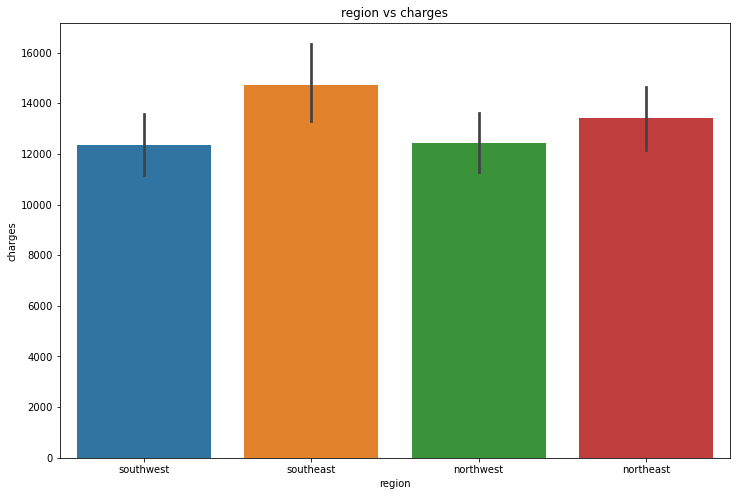

In [21]:
# region vs charges
# Dari grafik tersebut terlihat bahwa sebenarnya daerah tidak berperan dalam menentukan biaya asuransi

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

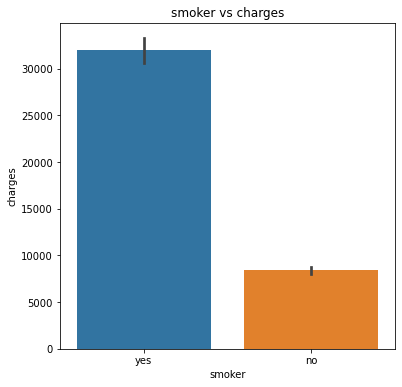

In [22]:
# smoker vs charges
# Dari grafik di bawah ini, terlihat bahwa perokok memiliki biaya asuransi yang lebih tinggi daripada bukan perokok

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

### Data Pre-processing

In [23]:
# menghapus kolom yang tidak perlu dari dataset

data = data.drop('region', axis = 1)

print(data.shape)

data.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [24]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 untuk perokok dan 1 non-perokok
data['smoker'] = le.fit_transform(data['smoker'])

In [25]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [26]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [27]:
x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [29]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Modelling

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 21552671.296812814
RMSE : 4642.485465439048
r2 score : 0.8602771638735189


MSE = menunjukkan perbedaan antara nilai sebenarnya dan nilai prediksi


RMSE = untuk mengetahui nilai rata-rata kesalahan pada model dalam memprediksi nilai total


r2 score = mewakili koefisien seberapa akurat nilai dibandingkan dengan nilai aslinya (semakin mendekati 1 semakin baik)

dan direpresentasikan dengan rumus



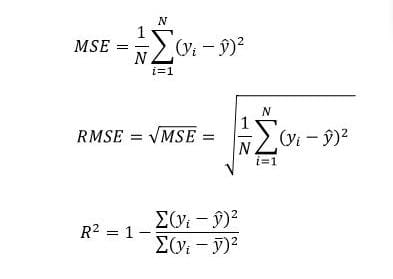

In [31]:
print(y_pred)

[44206.56552406  5417.53426664  5959.18098511 17018.33364774
 10375.93940166  5622.22815573  2880.31028148 10398.58565144
 43681.60675196 13375.00711539  6648.16829987 10427.51142605
 44234.24271059 13119.25222875  2880.31028148 24607.48729296
 10375.93940166  9298.96647998 17931.77490517 10168.72004285
  2880.31028148  6415.0817868  10067.96927177  7325.02605722
 25644.07581317 45312.55484049 13902.09053769  5270.01047595
  6981.96634205 10506.29732465  4935.9912007  37208.0754683
  2902.68044224 10412.06354637 13298.37460665  6415.0817868
  2930.92448759  6648.16829987  2880.31028148  6548.23342967
  6315.02918139 23312.24791842  4199.66113379 13298.37460665
  6791.23721205 38626.89284132  6315.02918139  2880.31028148
  3251.12017548  6400.60968593  7071.35936218 10301.78229384
 13444.56080907  2827.19936611  7060.20662885  7592.92393778
 20633.25430457  5006.20068463 13298.37460665  6326.4225509
 13757.58388717  6417.4881084  10874.92840187  5001.80052092
  2880.31028148  5417.53426

In [32]:
print(y_test)

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64
